# Loveida Lucero

# Chicago Crime Trending

**Imports**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
import holidays
import datetime as dt
from holidays import country_holidays

plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

**Load and Prep Data**

In [2]:
!pip install holidays

In [3]:
# Use glob to get all filepaths that match the pattern 
crime_files = sorted(glob.glob("Data/Chicago-Crime_*.csv"))
crime_files

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [4]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in crime_files])
df.reset_index()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [5]:
df['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [6]:
df['Primary Type'] = df['Primary Type'].replace({'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT',
                                                 'NON - CRIMINAL':'NON-CRIMINAL',})
df['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
CRIMINAL SEXUAL ASSAULT                33937
SEX OFFENSE                            30442
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [7]:
# convert date column to datetime
date_format = '%m/%d/%Y %I:%M:%S %p'
df['Date'] = pd.to_datetime(df['Date'],format=date_format)

In [8]:
# set date as index
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [9]:
df = df.sort_index()
df.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [10]:
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:00:00,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01 00:00:00,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01 00:00:00,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
2001-01-01 00:00:00,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
2001-01-01 00:00:00,9755214,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:47:00,12938351,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:47:00,12938340,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:50:00,12938426,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744


# **1) Comparing Police Districts**
  - Which district had the most crimes in 2022?
  - Which had the least?

In [11]:
df_2022 = df.loc['2022']
df_2022

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 00:00:00,12701677,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2413,24.0,40.0,41.994004,-87.697387
2022-01-01 00:00:00,12615410,DECEPTIVE PRACTICE,"THEFT BY LESSEE, MOTOR VEHICLE",STREET,False,False,1235,12.0,25.0,41.852750,-87.640816
2022-01-01 00:00:00,12658052,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,511,5.0,8.0,41.717813,-87.598279
2022-01-01 00:00:00,12957426,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,632,6.0,8.0,NaN,NaN
2022-01-01 00:00:00,13002739,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,734,7.0,17.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:47:00,12938351,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:47:00,12938340,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:50:00,12938426,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744


In [12]:
value_counts = df_2022.value_counts('District')
value_counts

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
dtype: int64

In [13]:
value_counts.index

Float64Index([ 8.0,  6.0, 12.0,  4.0, 11.0,  1.0, 18.0, 19.0, 25.0,  3.0,  2.0,
               9.0,  7.0, 10.0,  5.0, 16.0, 24.0, 15.0, 14.0, 22.0, 17.0, 20.0,
              31.0],
             dtype='float64', name='District')

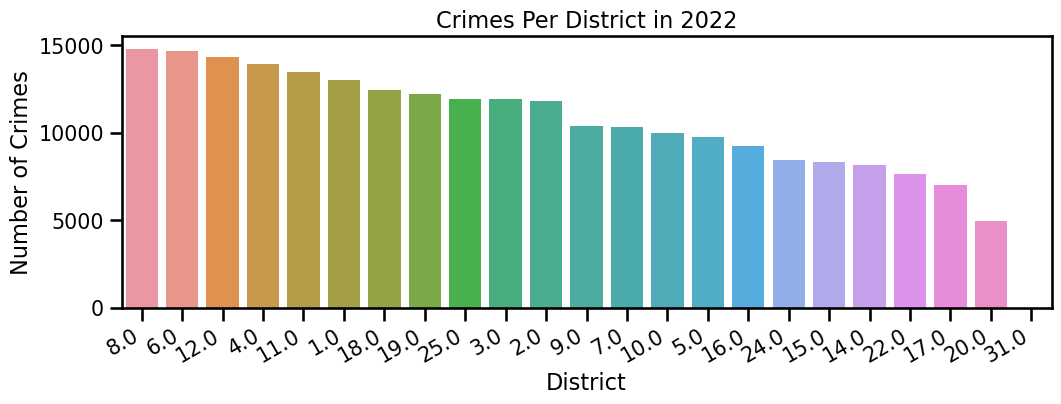

In [14]:
## Visualize district
ax = sns.countplot(data=df_2022, x='District',
                  order=value_counts.index)
ax.set_ylabel('Number of Crimes')
ax.set_title('Crimes Per District in 2022')
fig = ax.get_figure()
fig.autofmt_xdate()

In [15]:
# set min values
district_min = value_counts.idxmin()
crimes_min = value_counts.min()
# set max values
district_max = value_counts.idxmax()
crimes_max = value_counts.max()

In [16]:
print(f'District {district_max} had the most crimes in 2022, with a total of {crimes_max}.')

District 8.0 had the most crimes in 2022, with a total of 14805.


In [17]:
print(f'District {district_min} had the least crimes in 2022, with a total of {crimes_min}.')

District 31.0 had the least crimes in 2022, with a total of 15.


## Crimes Across the Years:

### Is the total number of crimes increasing or decreasing across the years?

In [18]:
df_res_year = df.resample('AS').size()
df_res_year

Date
2001-01-01    485886
2002-01-01    486807
2003-01-01    475985
2004-01-01    469422
2005-01-01    453773
2006-01-01    448179
2007-01-01    437087
2008-01-01    427183
2009-01-01    392827
2010-01-01    370513
2011-01-01    351993
2012-01-01    336319
2013-01-01    307536
2014-01-01    275789
2015-01-01    264787
2016-01-01    269823
2017-01-01    269100
2018-01-01    268899
2019-01-01    261325
2020-01-01    212194
2021-01-01    208824
2022-01-01    238858
Freq: AS-JAN, dtype: int64

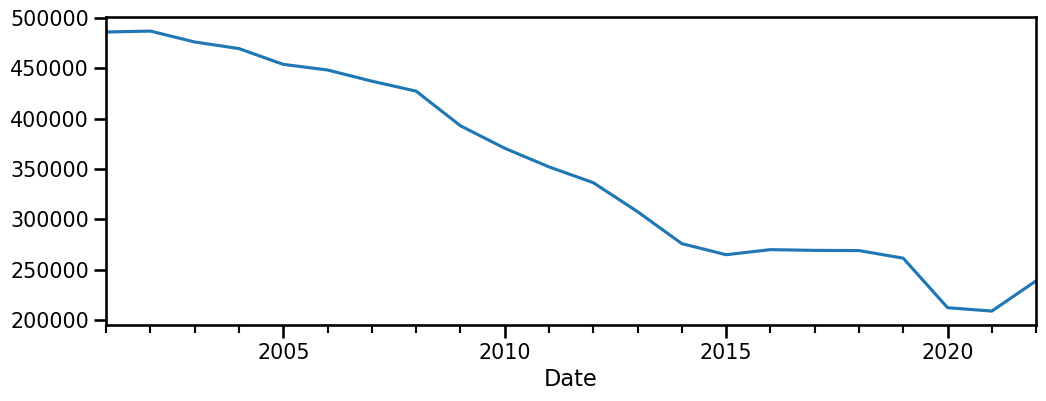

In [19]:
# Visualize the crimes over time
df_res_year.plot();

- **The total crimes per year are decreasing over time.**

### Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [20]:
# groupy by crime and year
df_res_crimes = df.groupby('Primary Type').resample('AS').size()
df_res_crimes

Primary Type       Date      
ARSON              2001-01-01    1011
                   2002-01-01    1032
                   2003-01-01     955
                   2004-01-01     778
                   2005-01-01     691
                                 ... 
WEAPONS VIOLATION  2018-01-01    5456
                   2019-01-01    6339
                   2020-01-01    8432
                   2021-01-01    8980
                   2022-01-01    8766
Length: 699, dtype: int64

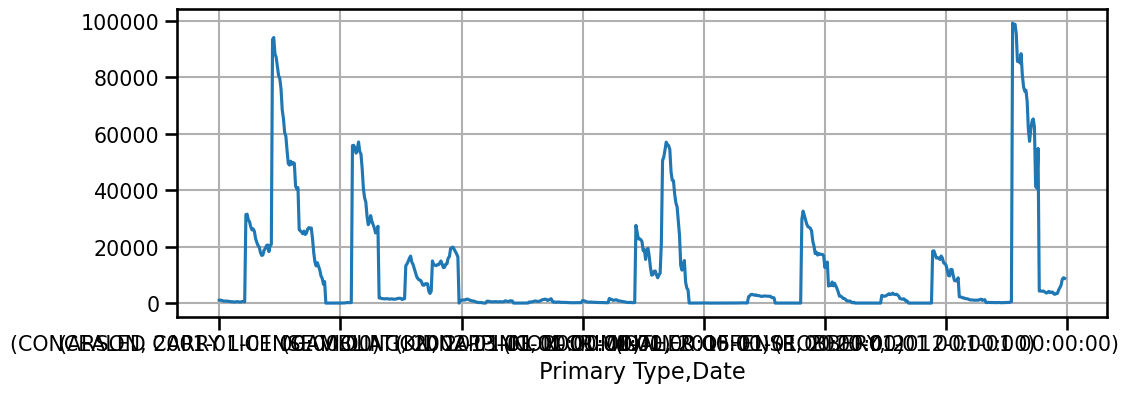

In [21]:
df_res_crimes.plot(grid=True);

In [22]:
theft = df_res_crimes.loc[pd.IndexSlice['THEFT':'THEFT'],:]
oic = df_res_crimes.loc[pd.IndexSlice['OFFENSE INVOLVING CHILDREN':'OFFENSE INVOLVING CHILDREN'],:]
so = df_res_crimes.loc[pd.IndexSlice['SEX OFFENSE':'SEX OFFENSE'],:]
cd = df_res_crimes.loc[pd.IndexSlice['CRIMINAL DAMAGE':'CRIMINAL DAMAGE'],:]
csa = df_res_crimes.loc[pd.IndexSlice['CRIMINAL SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT'],:]
assault = df_res_crimes.loc[pd.IndexSlice['ASSAULT':'ASSAULT'],:]
dp = df_res_crimes.loc[pd.IndexSlice['DECEPTIVE PRACTICE':'DECEPTIVE PRACTICE'],:]
of = df_res_crimes.loc[pd.IndexSlice['OTHER OFFENSE':'OTHER OFFENSE'],:]
batt = df_res_crimes.loc[pd.IndexSlice['BATTERY':'BATTERY'],:]
burg = df_res_crimes.loc[pd.IndexSlice['BURGLARY':'BURGLARY'],:]
mvt = df_res_crimes.loc[pd.IndexSlice['MOTOR VEHICLE THEFT':'MOTOR VEHICLE THEFT'],:]
wv = df_res_crimes.loc[pd.IndexSlice['WEAPONS VIOLATION':'WEAPONS VIOLATION'],:]
ct = df_res_crimes.loc[pd.IndexSlice['CRIMINAL TRESPASS':'CRIMINAL TRESPASS'],:]
rob = df_res_crimes.loc[pd.IndexSlice['ROBBERY':'ROBBERY'],:]
narc = df_res_crimes.loc[pd.IndexSlice['NARCOTICS':'NARCOTICS'],:]
llv = df_res_crimes.loc[pd.IndexSlice['LIQUOR LAW VIOLATION':'LIQUOR LAW VIOLATION'],:]
ppv = df_res_crimes.loc[pd.IndexSlice['PUBLIC PEACE VIOLATION':'PUBLIC PEACE VIOLATION'],:]
iwpo = df_res_crimes.loc[pd.IndexSlice['INTERFERENCE WITH PUBLIC OFFICER':'INTERFERENCE WITH PUBLIC OFFICER'],:]
stalk = df_res_crimes.loc[pd.IndexSlice['STALKING':'STALKING'],:]
homoc = df_res_crimes.loc[pd.IndexSlice['HOMICIDE':'HOMICIDE'],:]
gamb = df_res_crimes.loc[pd.IndexSlice['GAMBLING':'GAMBLING'],:]
kid = df_res_crimes.loc[pd.IndexSlice['KIDNAPPING':'KIDNAPPING'],:]
prost = df_res_crimes.loc[pd.IndexSlice['PROSTITUTION':'PROSTITUTION'],:]
intim = df_res_crimes.loc[pd.IndexSlice['INTIMIDATION':'INTIMIDATION'],:]
arson = df_res_crimes.loc[pd.IndexSlice['ARSON':'ARSON'],:]
rit = df_res_crimes.loc[pd.IndexSlice['RITUALISM':'RITUALISM'],:]
dv = df_res_crimes.loc[pd.IndexSlice['DOMESTIC VIOLENCE':'DOMESTIC VIOLENCE'],:]
obsc = df_res_crimes.loc[pd.IndexSlice['OBSCENITY':'OBSCENITY'],:]
onv = df_res_crimes.loc[pd.IndexSlice['OTHER NARCOTIC VIOLATION':'OTHER NARCOTIC VIOLATION'],:]
pi = df_res_crimes.loc[pd.IndexSlice['PUBLIC INDECENCY':'PUBLIC INDECENCY'],:]
cclv = df_res_crimes.loc[pd.IndexSlice['CONCEALED CARRY LICENSE VIOLATION':'CONCEALED CARRY LICENSE VIOLATION'],:]
nc = df_res_crimes.loc[pd.IndexSlice['NON-CRIMINAL':'NON-CRIMINAL'],:]
ht = df_res_crimes.loc[pd.IndexSlice['HUMAN TRAFFICKING':'HUMAN TRAFFICKING'],:]
ncss = df_res_crimes.loc[pd.IndexSlice['NON-CRIMINAL (SUBJECT SPECIFIED)':'NON-CRIMINAL (SUBJECT SPECIFIED)'],:]

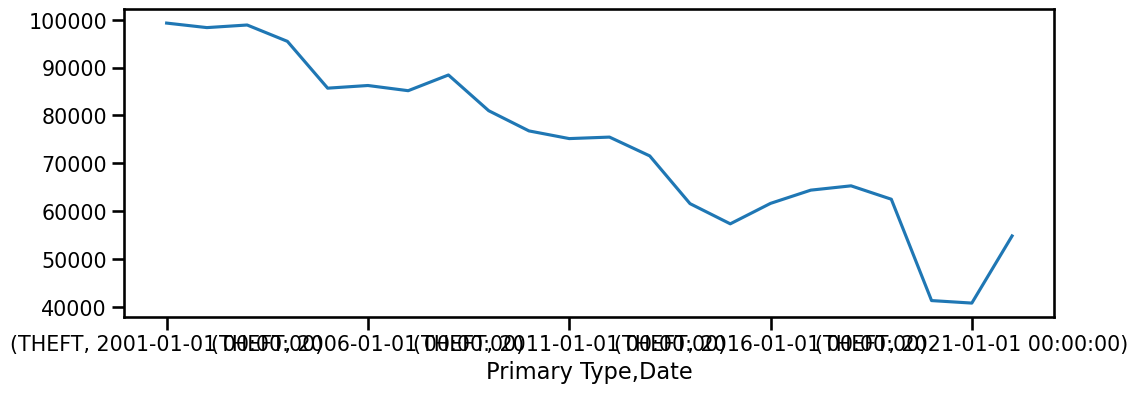

In [23]:
theft.plot();

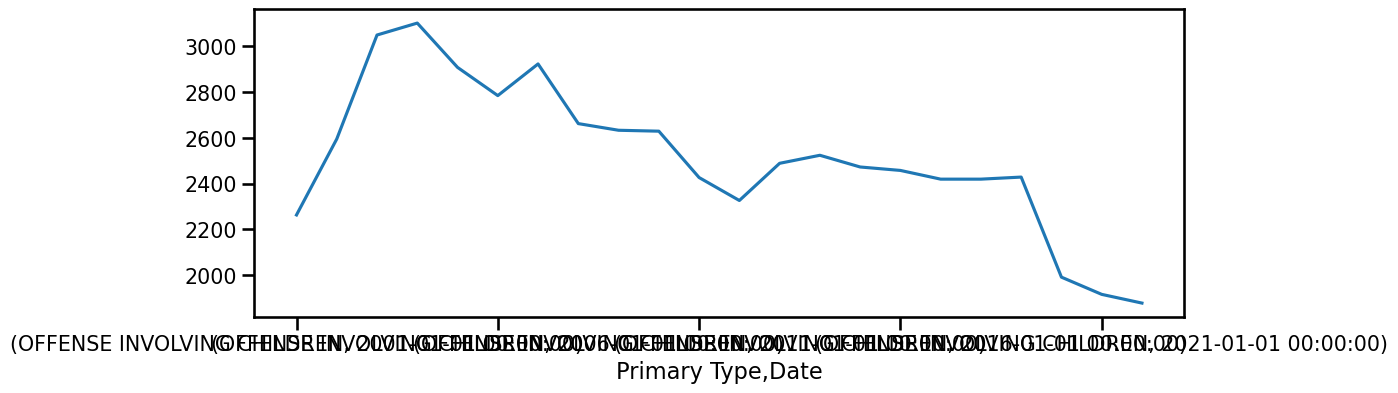

In [24]:
oic.plot();

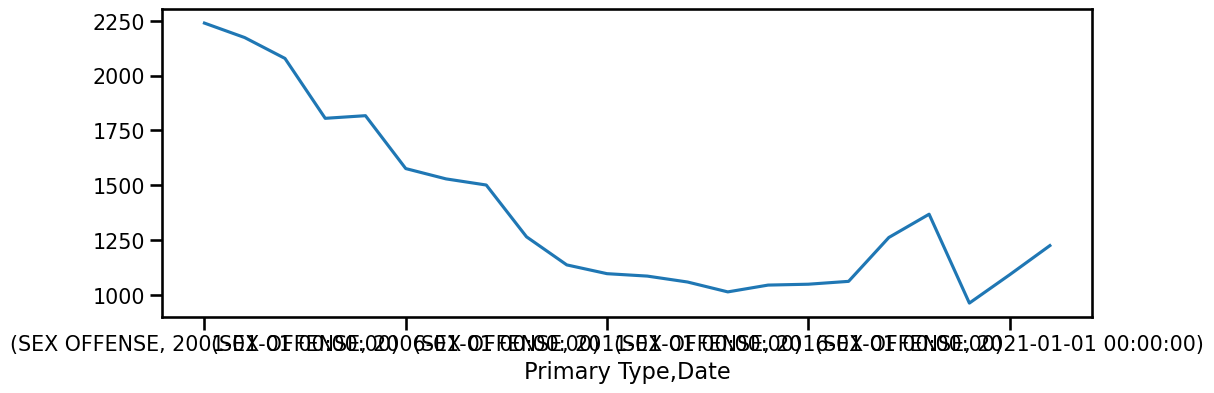

In [25]:
so.plot();

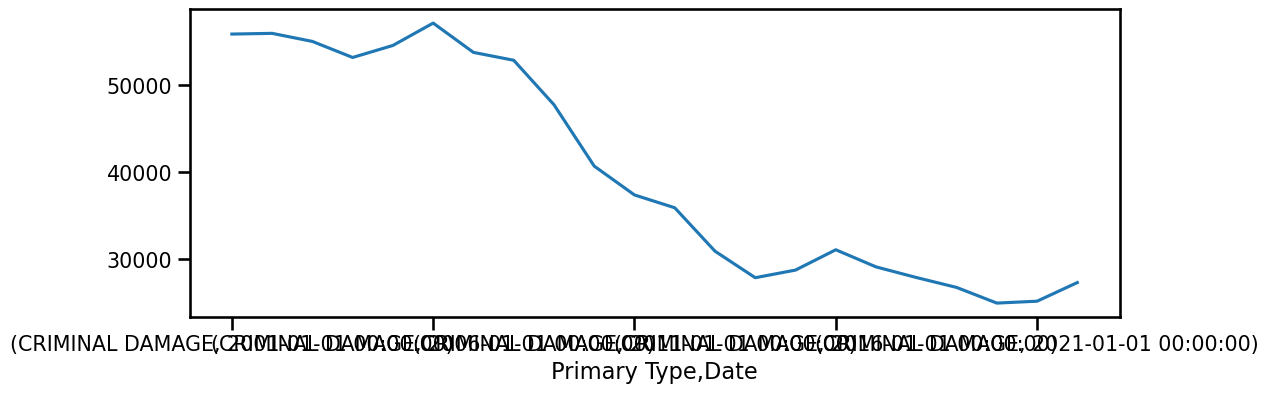

In [26]:
cd.plot();

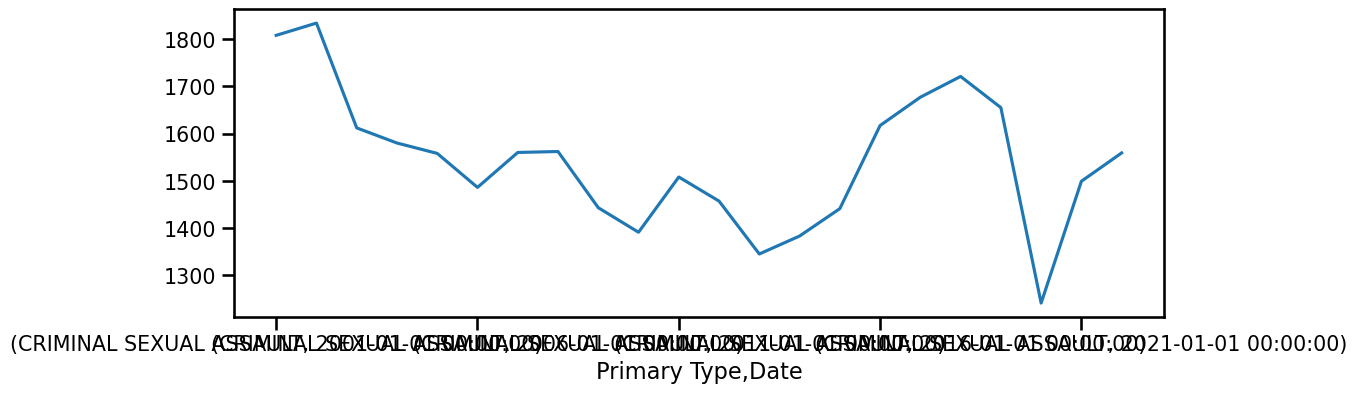

In [27]:
csa.plot();

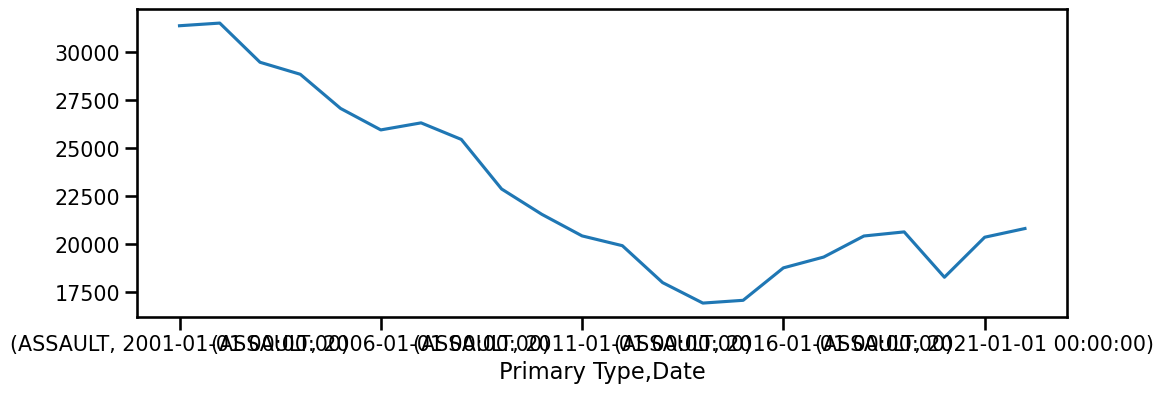

In [28]:
assault.plot();

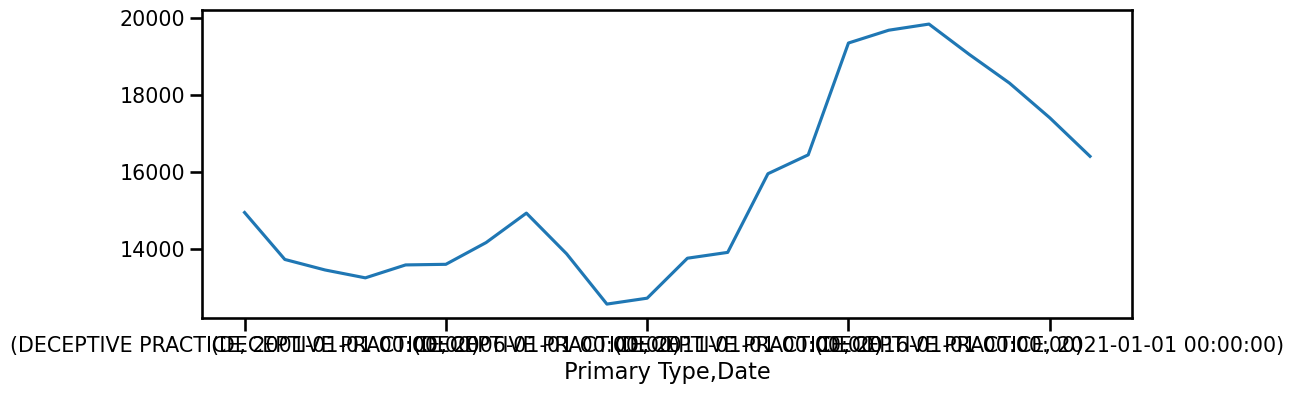

In [29]:
dp.plot();

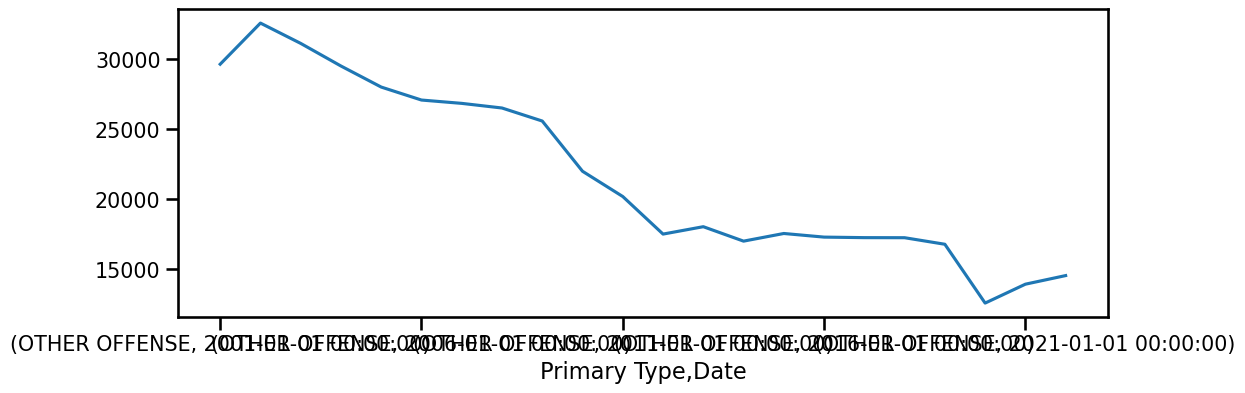

In [30]:
of.plot();

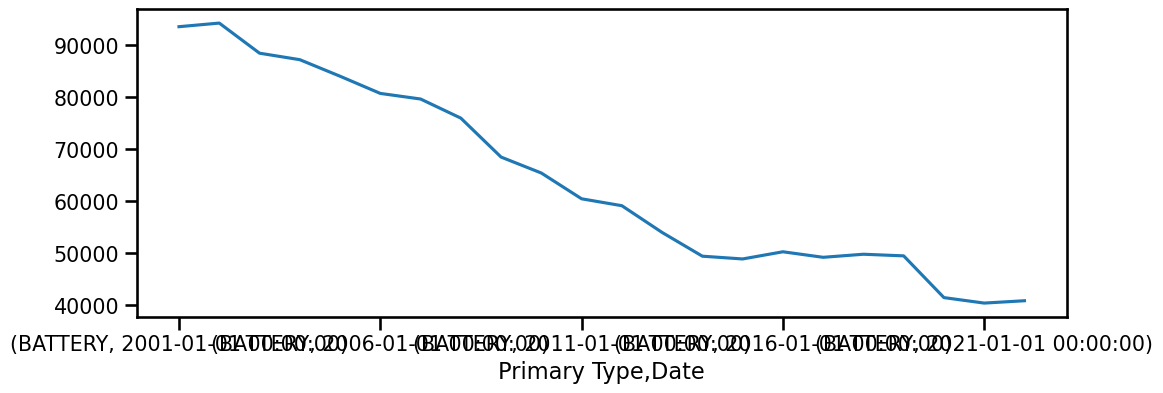

In [31]:
batt.plot();

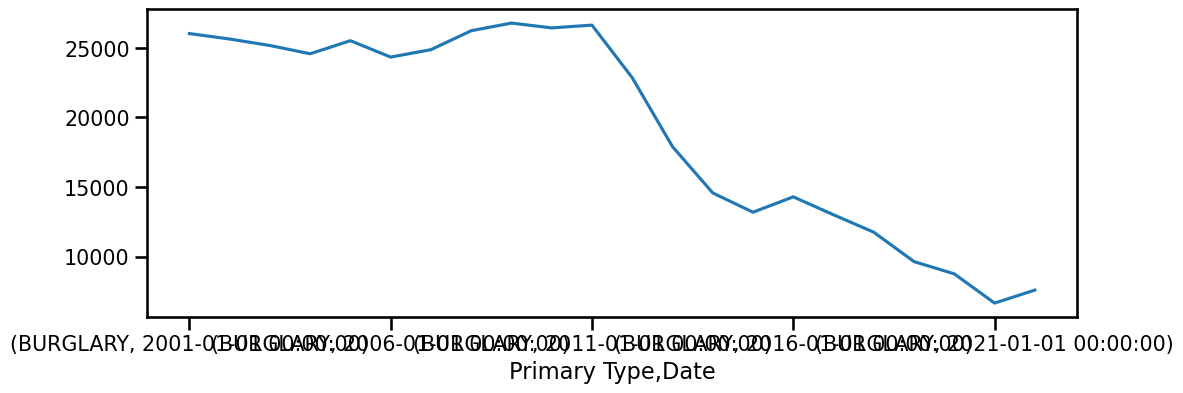

In [32]:
burg.plot();

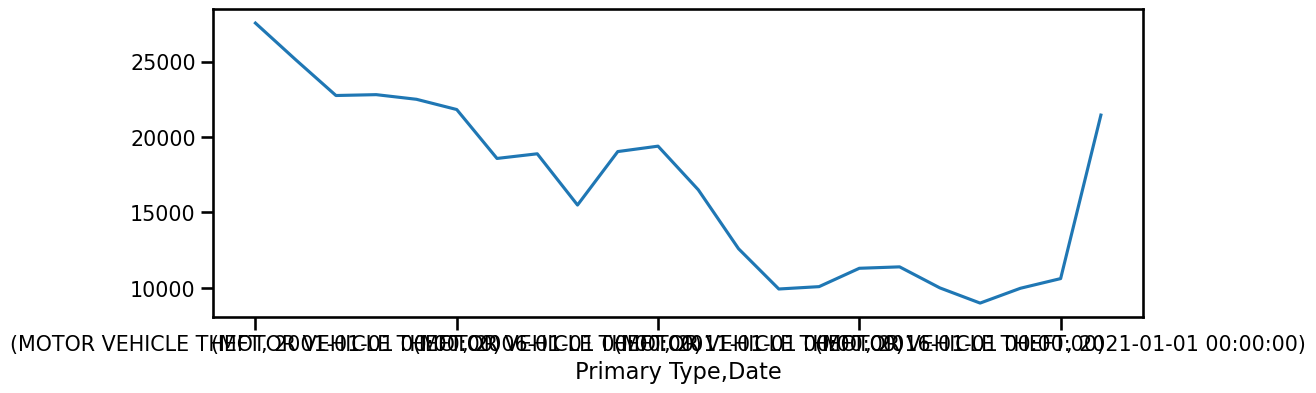

In [33]:
mvt.plot();

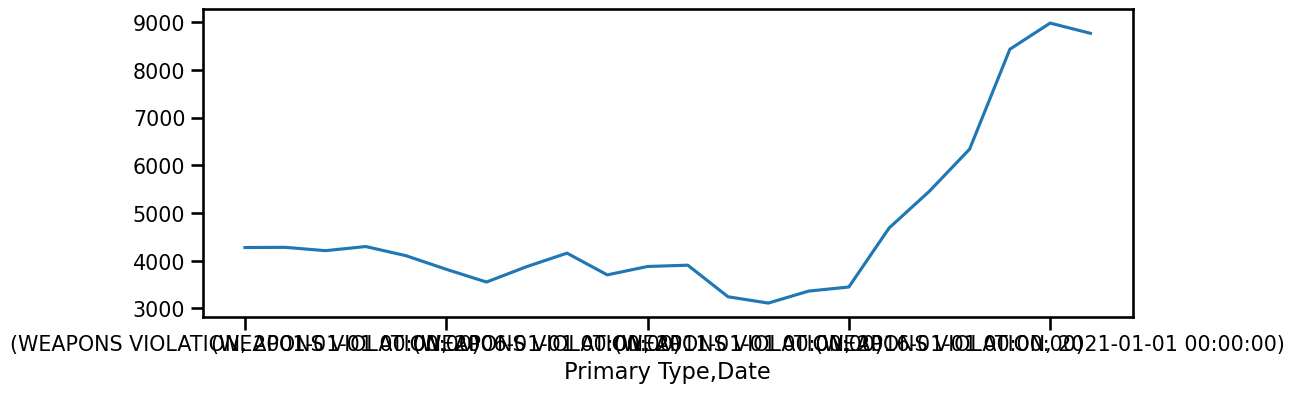

In [34]:
wv.plot();

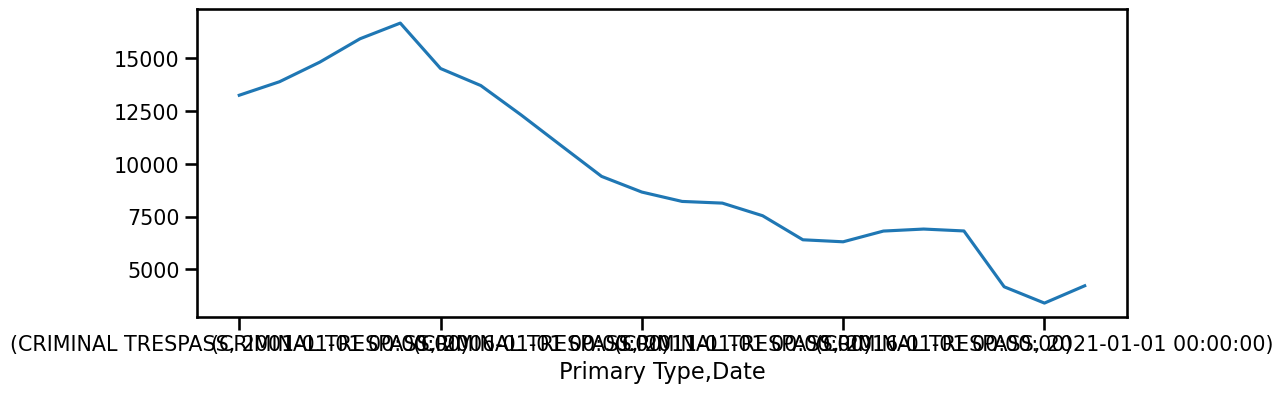

In [35]:
ct.plot();

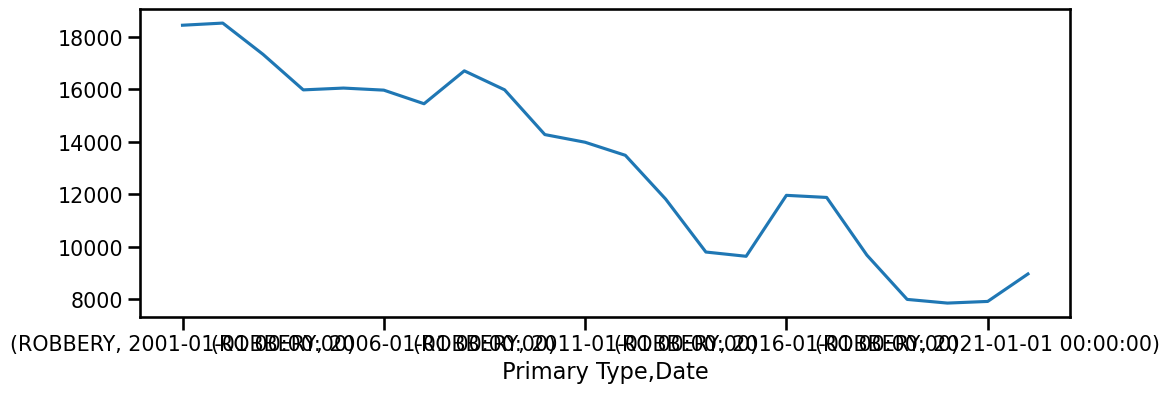

In [36]:
rob.plot();

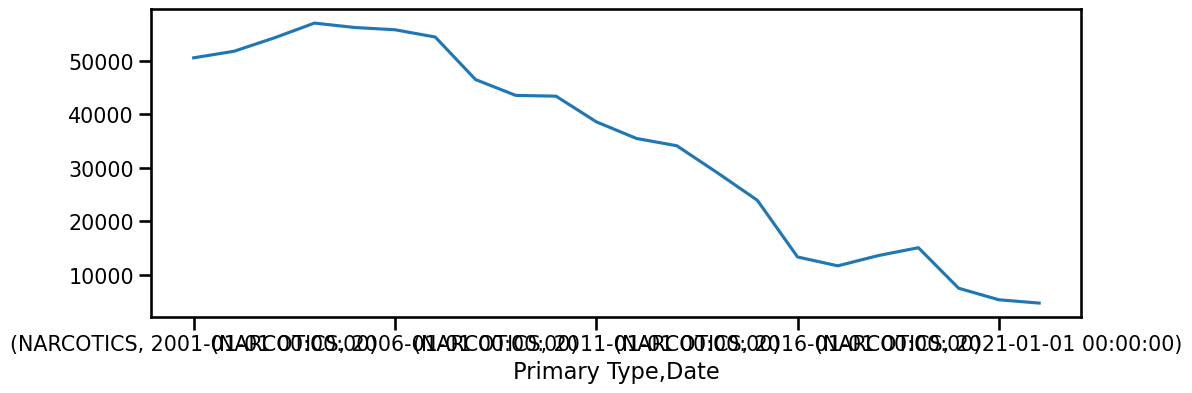

In [37]:
narc.plot();

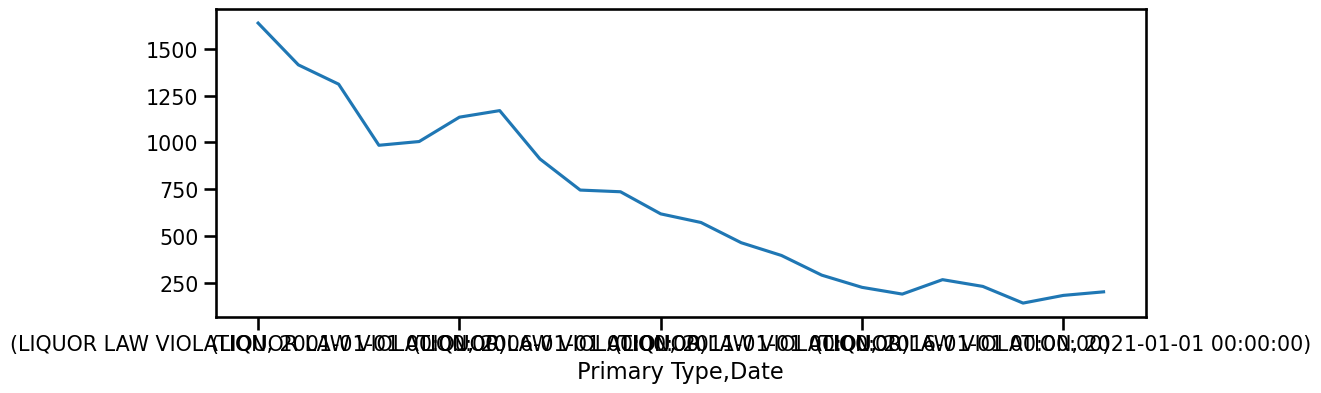

In [38]:
llv.plot();

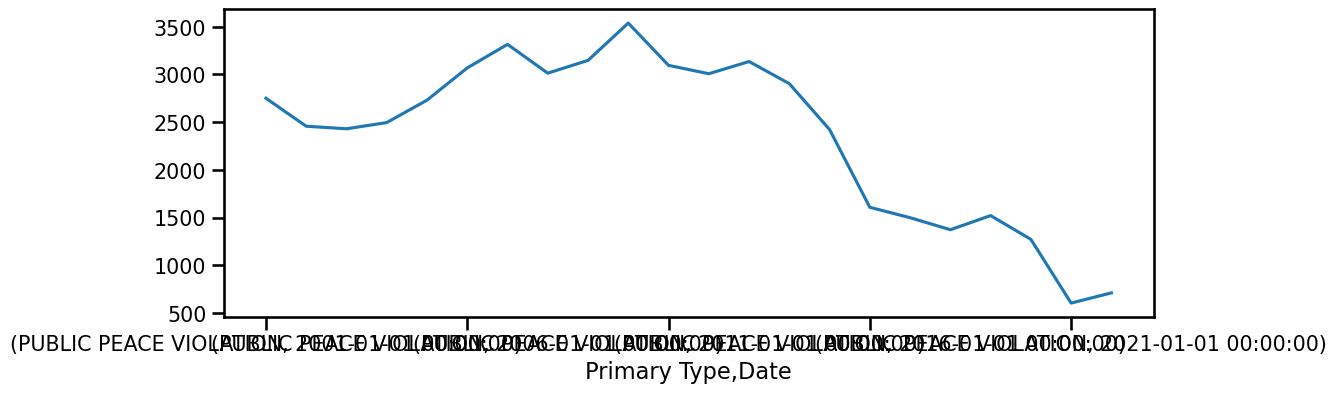

In [39]:
ppv.plot();

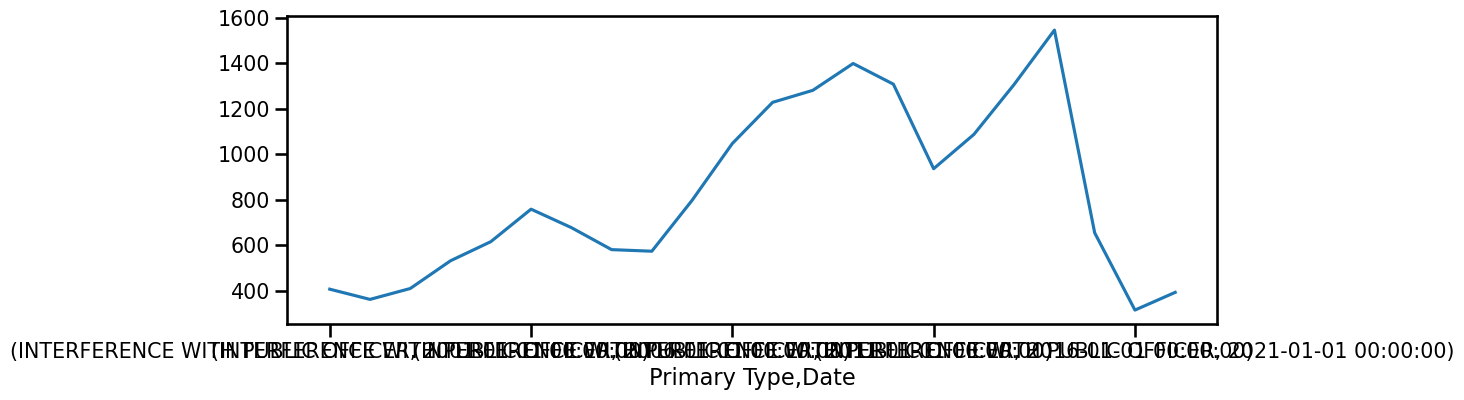

In [40]:
iwpo.plot();

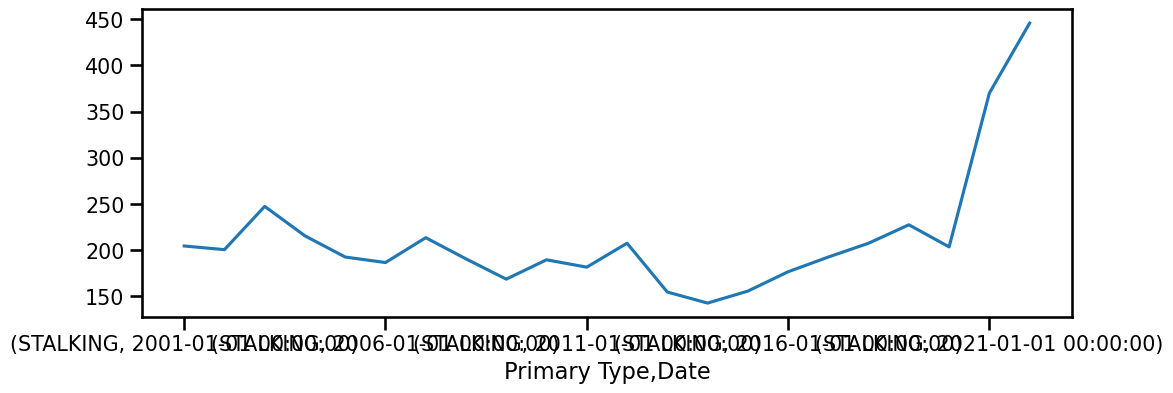

In [41]:
stalk.plot();

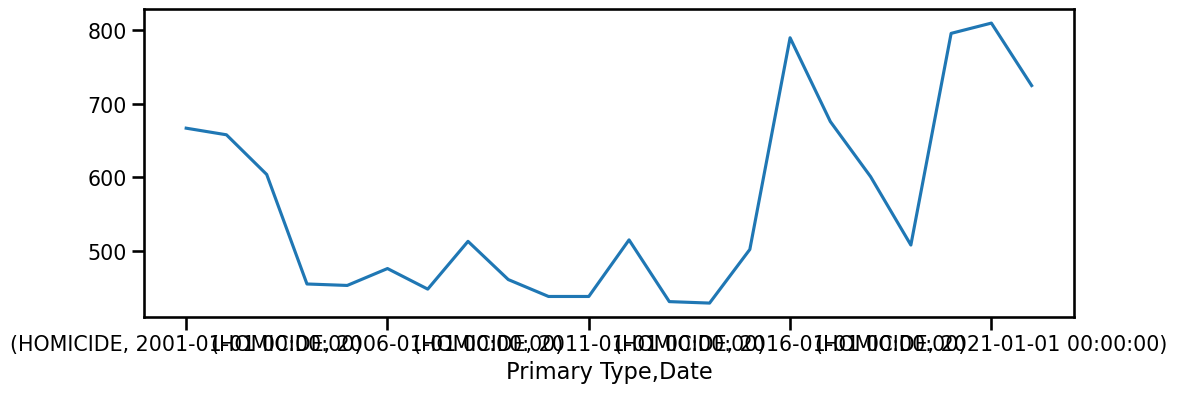

In [42]:
homoc.plot();

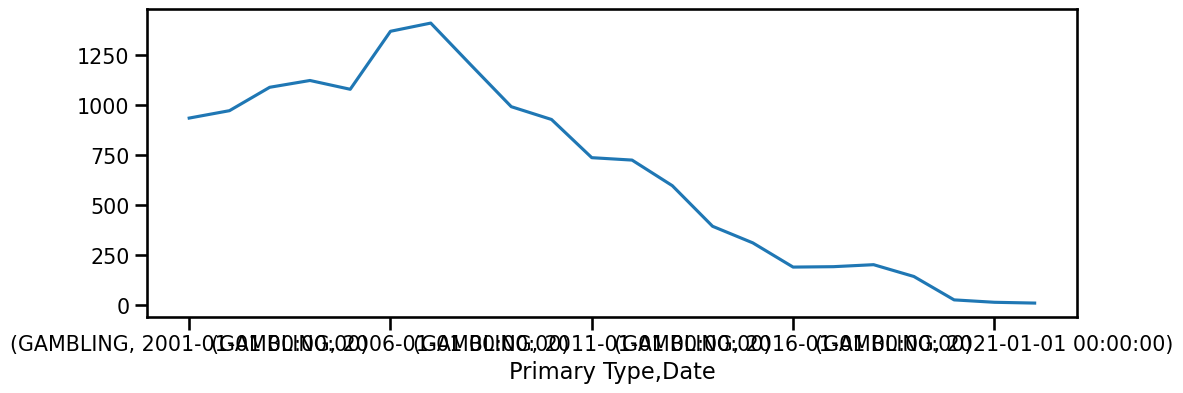

In [43]:
gamb.plot();

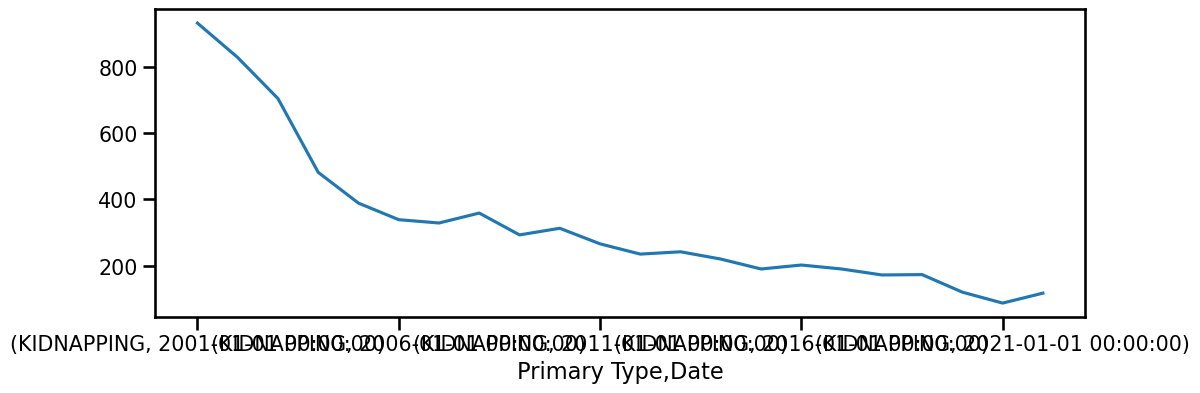

In [44]:
kid.plot();

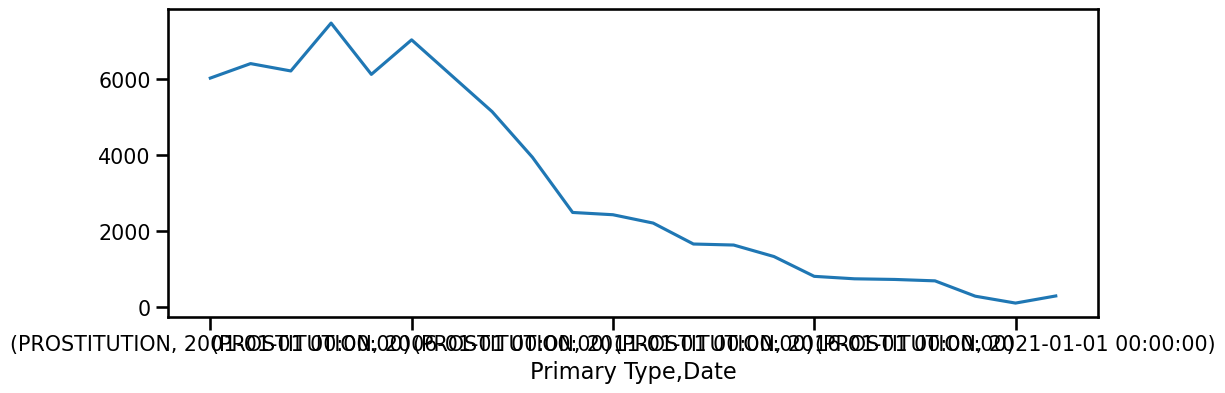

In [45]:
prost.plot();

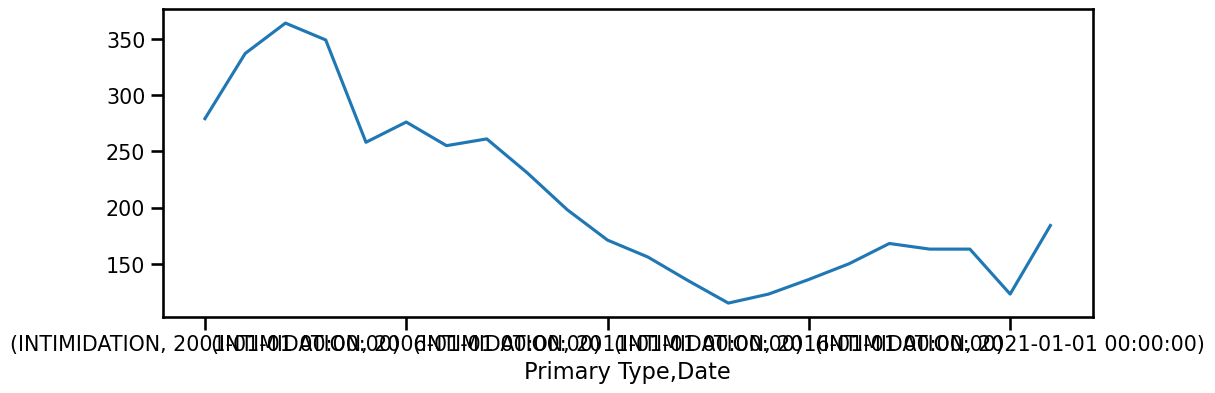

In [46]:
intim.plot();

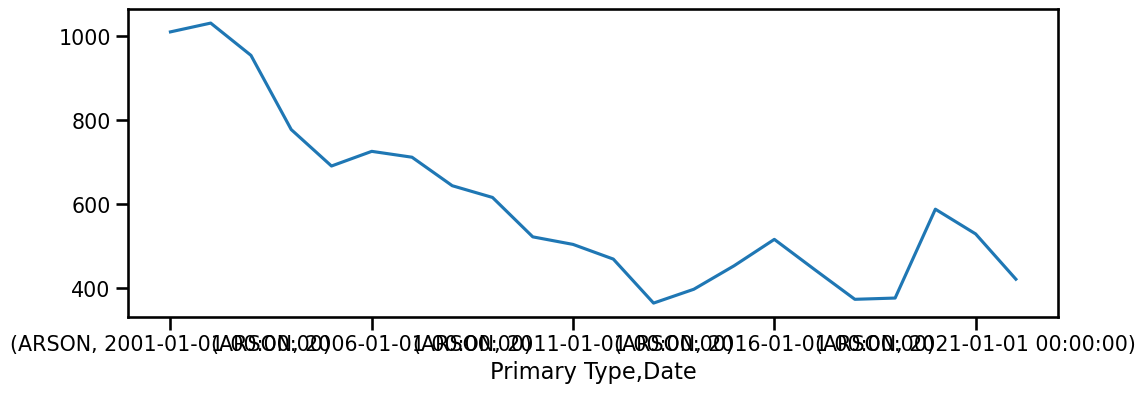

In [47]:
arson.plot();

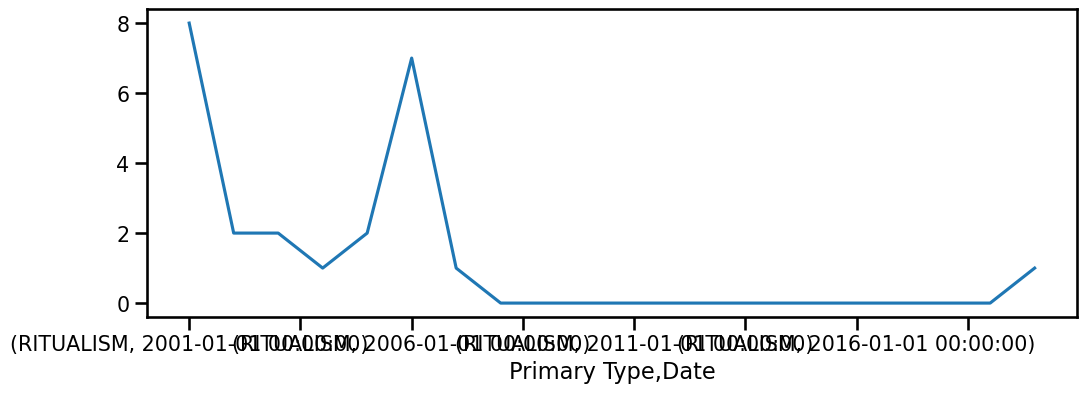

In [48]:
rit.plot();

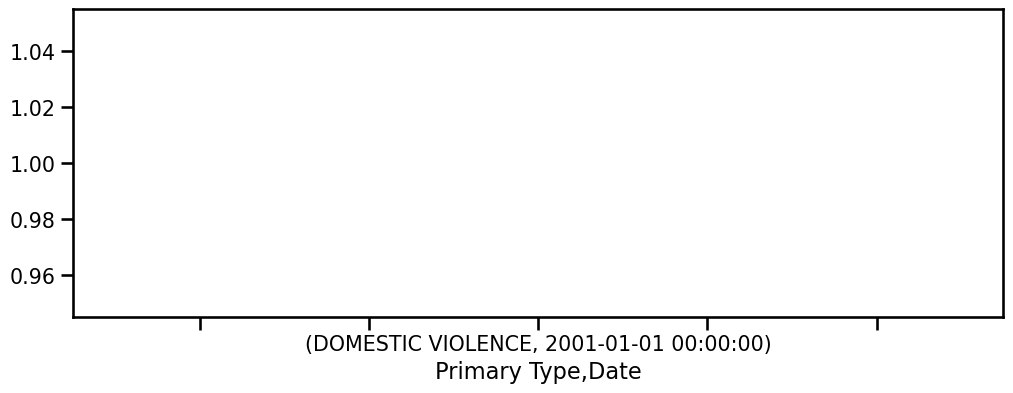

In [49]:
dv.plot();

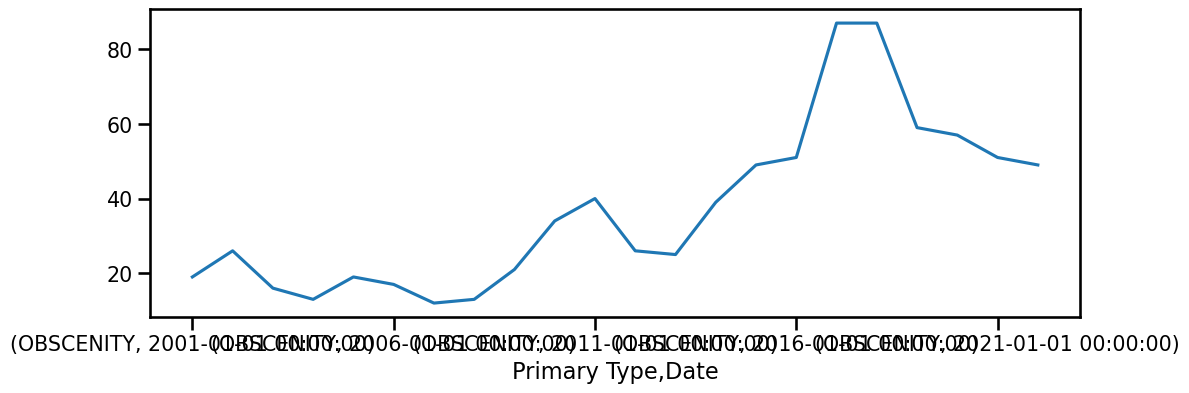

In [50]:
obsc.plot();

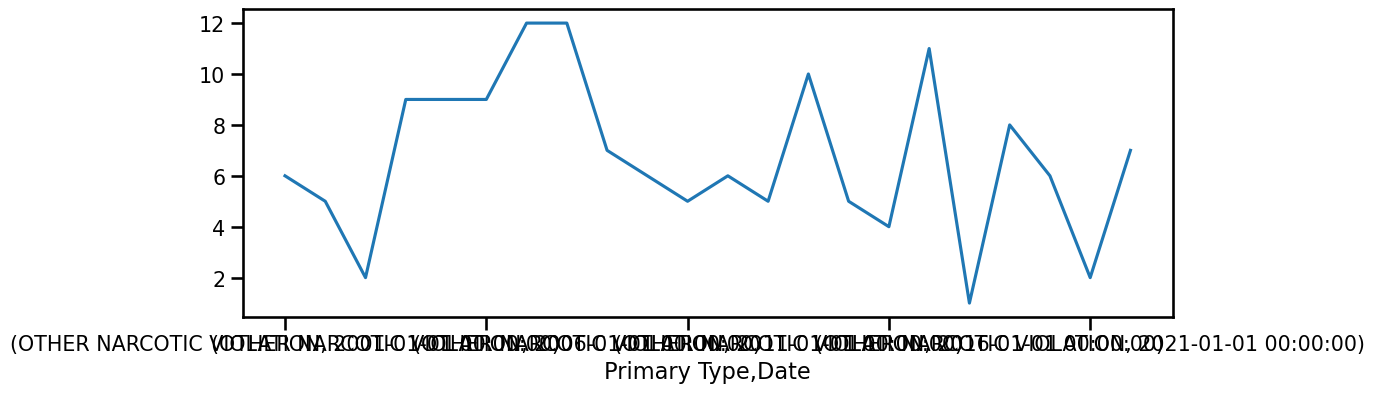

In [51]:
onv.plot();

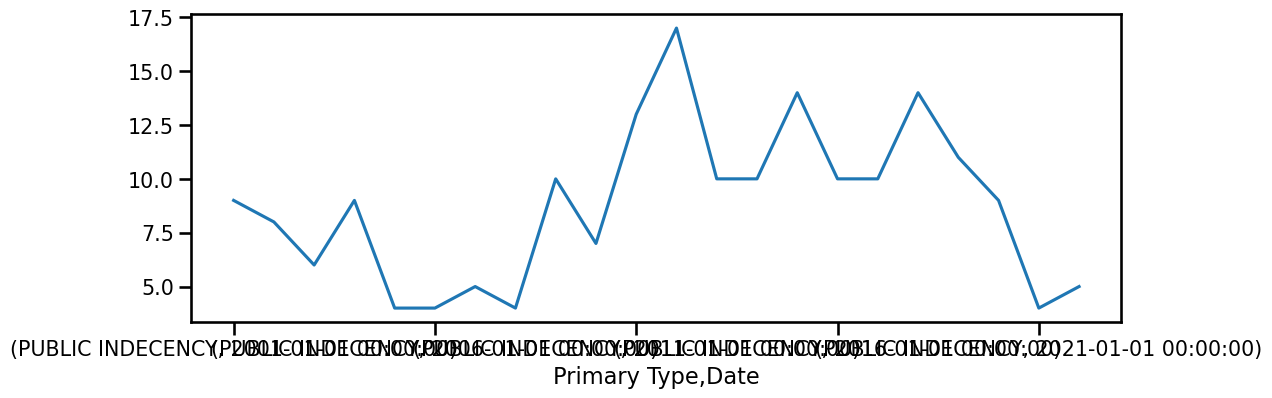

In [52]:
pi.plot();

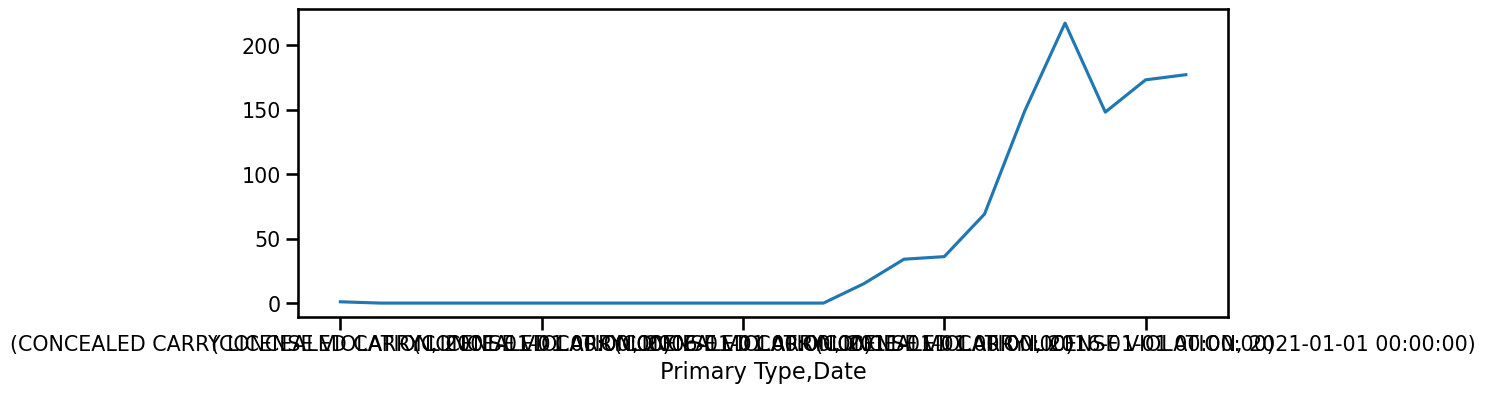

In [53]:
cclv.plot();

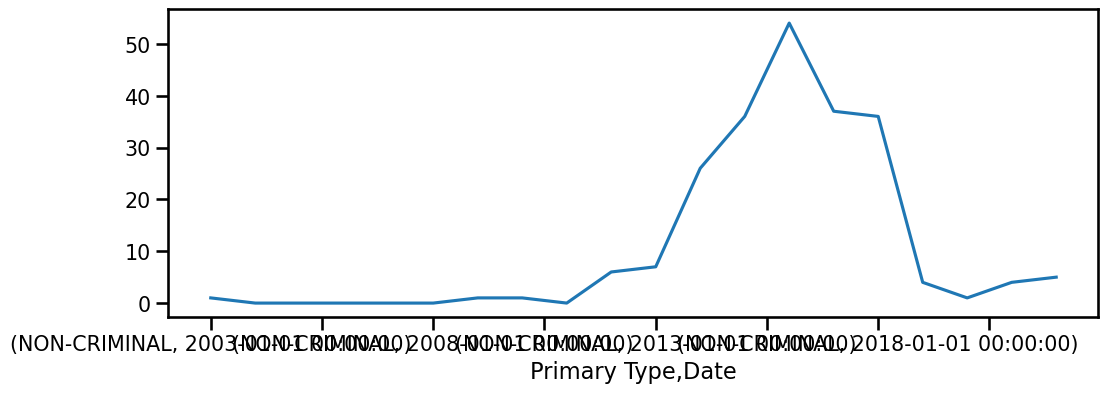

In [54]:
nc.plot();

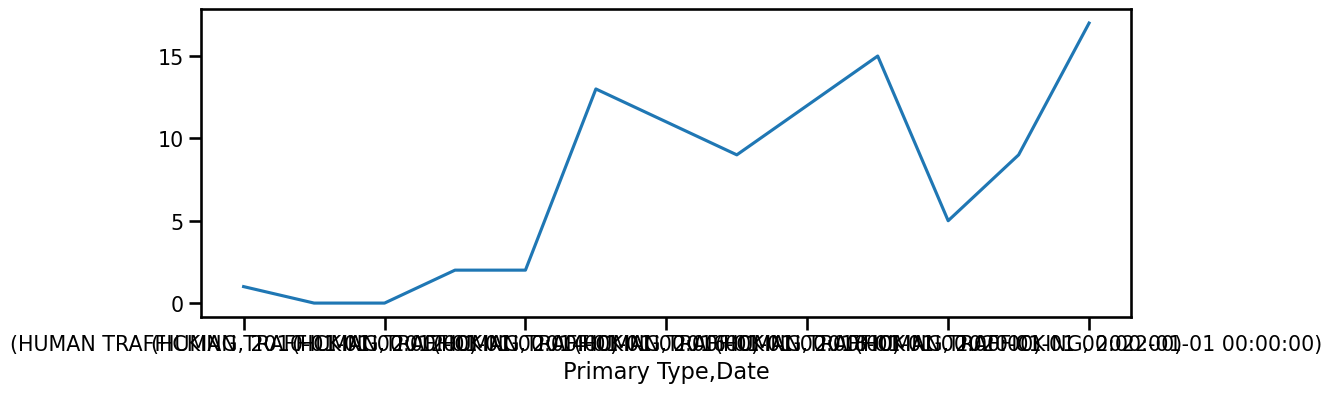

In [55]:
ht.plot();

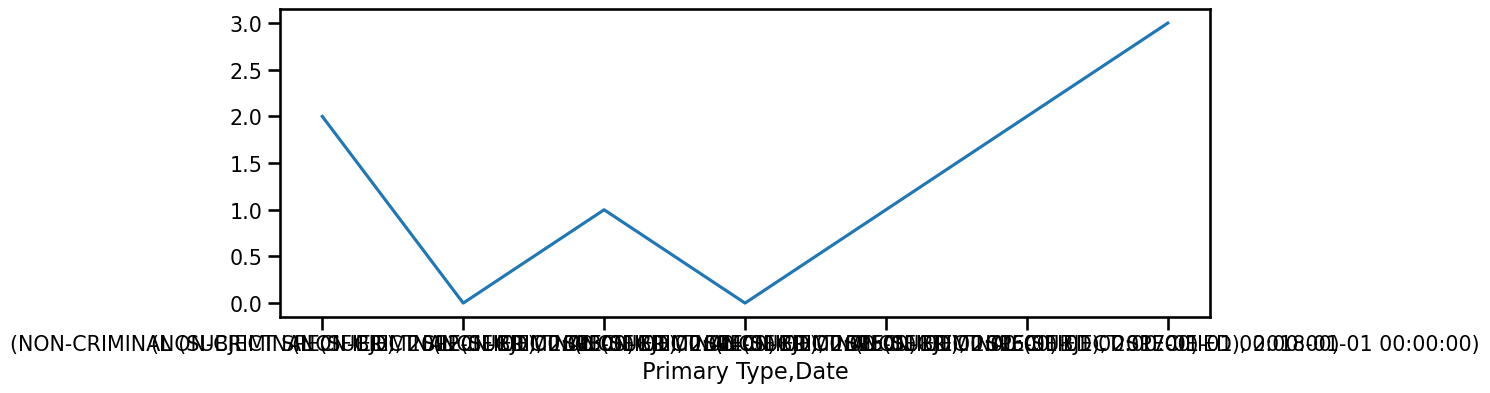

In [56]:
ncss.plot();

## **3) Comparing AM vs. PM Rush Hour:**
  - Are crimes more common during AM rush hour or PM rush hour?
    - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    - You can consider any crime that occurred between 4 - 7 PM as PM rush hour.
  - **Answer the question:** ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
  - **Answer the question:** ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

## **4) Comparing Months:**
  - **Answer the question:** ​What months have the most crime? What months have the least?
  - **Answer the question:** Are there any individual crimes that do not follow this pattern? If so, which crimes?

## **5) Comparing Holidays:**

### ​What are the top 3 holidays with the largest number of crimes?

In [57]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [58]:
hol_df = df.copy()
hol_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707


In [59]:
hol_df['Date'] = hol_df.index.date
hol_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date
Date,,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923,2001-01-01
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137,2001-01-01
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707,2001-01-01


In [60]:
## Saving both holiday types as columns
hol_df["US Holiday"] = [us_holidays.get(day) for day in hol_df['Date']]
hol_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,US Holiday
Date,,,,,,,,,,,,,
2001-01-01 00:00:00,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923,2001-01-01,New Year's Day
2001-01-01 00:00:00,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137,2001-01-01,New Year's Day
2001-01-01 00:00:00,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707,2001-01-01,New Year's Day
2001-01-01 00:00:00,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782,2001-01-01,New Year's Day
2001-01-01 00:00:00,9755214,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN,2001-01-01,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:47:00,12938351,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399,2022-12-31,None
2022-12-31 23:47:00,12938340,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399,2022-12-31,None
2022-12-31 23:50:00,12938426,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744,2022-12-31,None


In [64]:
## US Holidays
hol_df['US Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Christmas Day (Observed)                            4929
New Year's Day (Observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

- The top 3 holidays with the largest number of crimes:
    - New Year's Day(32,725 crimes)
    - Independence Day(22,672 crimes)
    - Labor Day(22,164 crimes)

### For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

## **Topic 6) What cycles (seasonality) can you find in this data?**
  - **Make sure to select the data of interest and that it is resampled to the frequency you want.** *(See the "Suggested data to check for seasons" list at the bottom of this topic for suggestions).*
  - **Use statsmodels.tsa.seasonal.seasonal_decompose() to decompose the time series.**
    - Note: seasonal_decompose cannot read data resampled as minutes or smaller, and if you try seconds, you will crash your computer. Keep your resampling at hours or more.

  - **Show and describe each cycle you can find.**
  - (Hint: If your seasonal results are too dense to read, try zooming in to look at just one year or one month and try different levels of resampling).
  - **Answer the question:** ​How long is a cycle?
  - **Answer the question:** ​What is the magnitude of the cycle? (Compare min and max).

  - Suggested data to check for seasons:
    - Total Crime (Daily)
    - Total Crime (Weekly)
    - Total Crime (Monthly)
    - Select a Primary Type of interest to you (Daily)
    - Select a Primary Type of interest to you (Weekly)
    - Select a Primary Type of interest to you (Monthly)